In [1]:
import pandas as pd
import swifter
import json
import seaborn as sns

# Functions

In [2]:
def change_from_object_data_type(dfs, non_object_features, float_features):
    for i in range (len(non_object_features)):
        for feature in non_object_features[i]:
            if feature not in float_features:
                dfs[i][feature] = dfs[i][feature].astype('int32')
            else:
                dfs[i][feature] = dfs[i][feature].astype('float32')

def overs_to_balls(overs):
    overs = overs.split('.')
    for i in range (len(overs)):
        if i == 0:
            overs[0] = int(overs[0]) * 6
        elif i == 1:
            overs[1] = int(overs[1])
    return sum(overs)

def get_json_as_df(_dir_, element_name):
    with open(_dir_) as f:
        data = json.load(f)
        
    if element_name == None:
        return pd.DataFrame(data)
    else:        
        elements = []

        for element in data:
            elements.extend(element[element_name])
        return pd.DataFrame(elements)

def remove_special_characters(string):
    if ('(c)' in string) or ('†' in string):
        string = string.replace('(c)', '')
        
    for character in string:
        if not (character.isalpha() or character.isdigit() or character == ' '):
            string = string.replace(character, '')
    return string.strip()

def sort_n_join_teams(match):
    match = match.lower()
    match = match.split('vs')
    match = [x.strip() for x in match]
    match.sort()
    match = [team.capitalize() for team in match]
    print(match)
    match = ' Vs '.join(match)
    return match

# Importing all the JSON as df

In [3]:
df_1 = get_json_as_df('data-analytics-project-for-beginners/t20_json_files/t20_wc_match_results.json', 'matchSummary')
df_2 = get_json_as_df('data-analytics-project-for-beginners/t20_json_files/t20_wc_player_info.json', None)
df_3 = get_json_as_df('data-analytics-project-for-beginners/t20_json_files/t20_wc_batting_summary.json', 'battingSummary')
df_4 = get_json_as_df('data-analytics-project-for-beginners/t20_json_files/t20_wc_bowling_summary.json', 'bowlingSummary')

# EDA

In [4]:
print(df_1.info())
print('\n')
print(df_2.info())
print('\n')
print(df_3.info())
print('\n')
print(df_4.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   team1      45 non-null     object
 1   team2      45 non-null     object
 2   winner     45 non-null     object
 3   margin     45 non-null     object
 4   ground     45 non-null     object
 5   matchDate  45 non-null     object
 6   scorecard  45 non-null     object
dtypes: object(7)
memory usage: 2.6+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          219 non-null    object
 1   team          219 non-null    object
 2   battingStyle  219 non-null    object
 3   bowlingStyle  219 non-null    object
 4   playingRole   219 non-null    object
 5   description   219 non-null    object
dtypes: object(6)
memory usage: 10.4+ KB
None


<class 'pand

In [5]:
eda_df_3 = df_3.copy()
eda_df_4 = df_4.copy()

eda_df_3['SR'] = eda_df_3['SR'].swifter.apply(lambda x: 0 if x == '-' else x)
eda_df_4['balls'] = eda_df_4['overs'].swifter.apply(lambda x: overs_to_balls(x))

Pandas Apply:   0%|          | 0/699 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/500 [00:00<?, ?it/s]

In [6]:
change_from_object_data_type([eda_df_3, eda_df_4], 
                             [df_3.iloc[:,-5:].columns, df_4.iloc[:,-10:].columns], 
                             [df_3.iloc[:,-5:].columns[-1], df_4.iloc[:,-10:].columns[0], df_4.iloc[:,-10:].columns[4]])

In [7]:
print(eda_df_3.info())
print('\n')
print(eda_df_4.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   match        699 non-null    object 
 1   teamInnings  699 non-null    object 
 2   battingPos   699 non-null    int64  
 3   batsmanName  699 non-null    object 
 4   dismissal    699 non-null    object 
 5   runs         699 non-null    int32  
 6   balls        699 non-null    int32  
 7   4s           699 non-null    int32  
 8   6s           699 non-null    int32  
 9   SR           699 non-null    float32
dtypes: float32(1), int32(4), int64(1), object(4)
memory usage: 41.1+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   match        500 non-null    object 
 1   bowlingTeam  500 non-null    object 
 2   bowlerName   500 non-null    obje

## df_3

<Axes: xlabel='4s', ylabel='balls'>

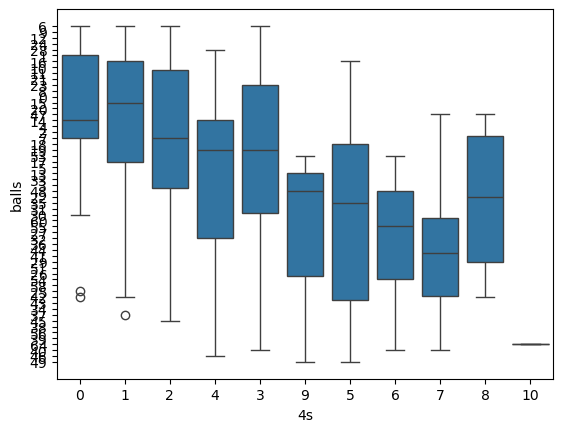

In [8]:
sns.boxplot(data = df_3, x='4s', y='balls')

<Axes: xlabel='6s', ylabel='balls'>

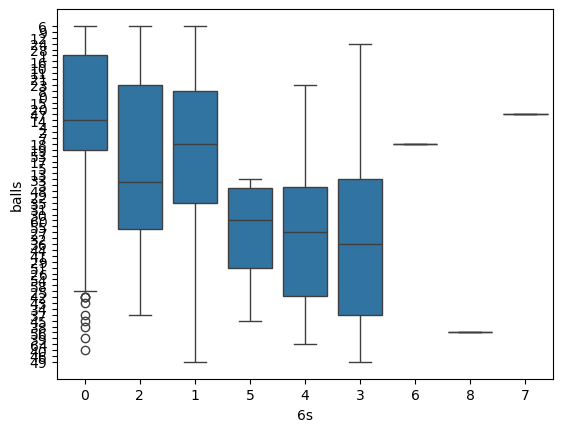

In [9]:
sns.boxplot(data = df_3, x='6s', y='balls')

array([[<Axes: title={'center': 'runs'}>,
        <Axes: title={'center': 'balls'}>],
       [<Axes: title={'center': '4s'}>, <Axes: title={'center': '6s'}>],
       [<Axes: title={'center': 'SR'}>, <Axes: >]], dtype=object)

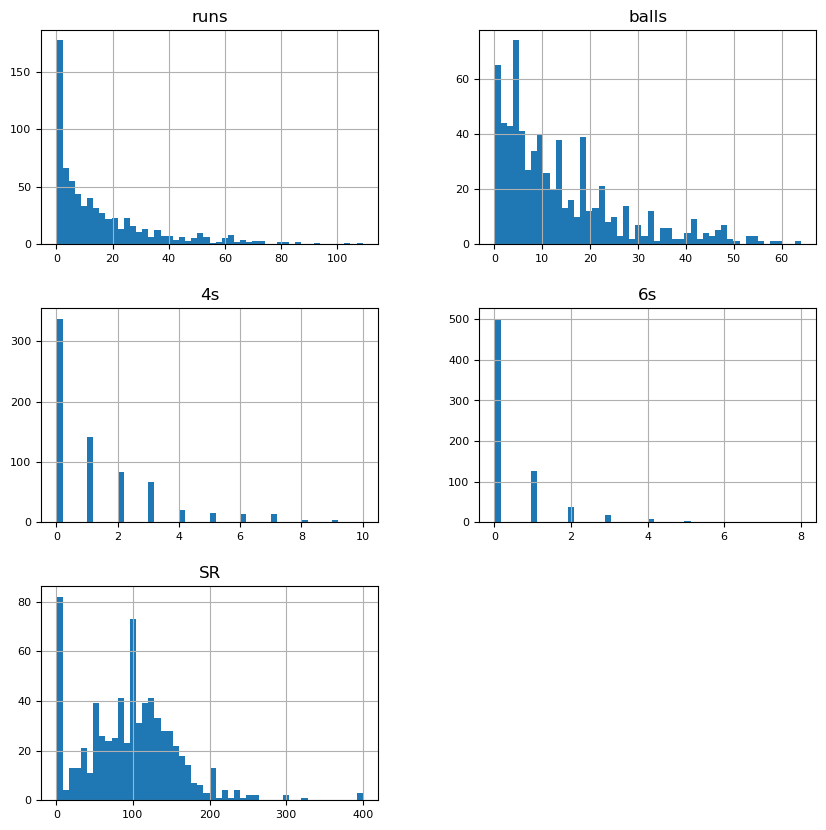

In [10]:
df_3_hist_features = eda_df_3.iloc[:,-5:].columns

eda_df_3[df_3_hist_features].hist(figsize=(10, 10), bins=50, xlabelsize=8, ylabelsize=8)

## df_4

<Axes: xlabel='4s', ylabel='balls'>

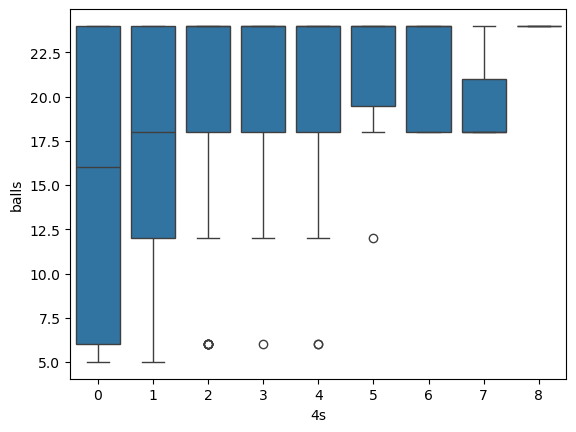

In [11]:
sns.boxplot(data = eda_df_4, x='4s', y='balls')

<Axes: xlabel='6s', ylabel='balls'>

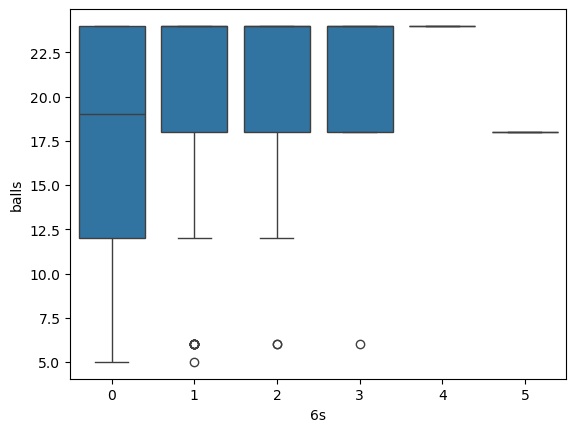

In [12]:
sns.boxplot(data = eda_df_4, x='6s', y='balls')

array([[<Axes: title={'center': 'maiden'}>,
        <Axes: title={'center': 'runs'}>,
        <Axes: title={'center': 'wickets'}>],
       [<Axes: title={'center': 'economy'}>,
        <Axes: title={'center': '0s'}>, <Axes: title={'center': '4s'}>],
       [<Axes: title={'center': '6s'}>,
        <Axes: title={'center': 'wides'}>,
        <Axes: title={'center': 'noBalls'}>],
       [<Axes: title={'center': 'balls'}>, <Axes: >, <Axes: >]],
      dtype=object)

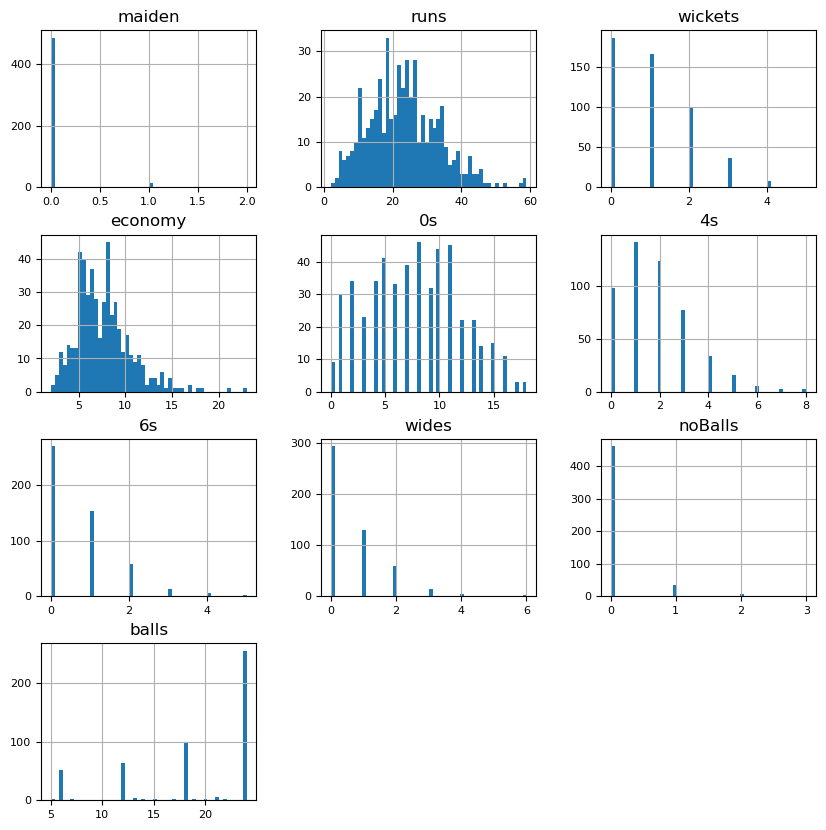

In [13]:
df_4_hist_features = eda_df_4.iloc[:,-10:].columns

eda_df_4[df_4_hist_features].hist(figsize=(10, 10), bins=50, xlabelsize=8, ylabelsize=8)

# Data Cleaning

## DF_1: t20_wc_match_results

In [14]:
df_1

,team1,team2,winner,margin,ground,matchDate,scorecard
0,Namibia,Sri Lanka,Namibia,55 runs,Geelong,"Oct 16, 2022",T20I # 1823
1,Netherlands,U.A.E.,Netherlands,3 wickets,Geelong,"Oct 16, 2022",T20I # 1825
2,Scotland,West Indies,Scotland,42 runs,Hobart,"Oct 17, 2022",T20I # 1826
3,Ireland,Zimbabwe,Zimbabwe,31 runs,Hobart,"Oct 17, 2022",T20I # 1828
4,Namibia,Netherlands,Netherlands,5 wickets,Geelong,"Oct 18, 2022",T20I # 1830
5,Sri Lanka,U.A.E.,Sri Lanka,79 runs,Geelong,"Oct 18, 2022",T20I # 1832
6,Ireland,Scotland,Ireland,6 wickets,Hobart,"Oct 19, 2022",T20I # 1833
7,West Indies,Zimbabwe,West Indies,31 runs,Hobart,"Oct 19, 2022",T20I # 1834
8,Netherlands,Sri Lanka,Sri Lanka,16 runs,Geelong,"Oct 20, 2022",T20I # 1835
9,Namibia,U.A.E.,U.A.E.,7 runs,Geelong,"Oct 20, 2022",T20I # 1836


In [15]:
df_1['match'] = df_1['team1'] + ' vs ' + df_1['team2']
df_1['match'] = df_1['match'].swifter.apply(lambda x: sort_n_join_teams(x))
df_1['match_id'] = df_1['scorecard'].swifter.apply(lambda x: x.split('#')[1].strip())
df_1['match_won_via'] = df_1['margin'].swifter.apply(lambda x: 'no_result' if x =='' else x.split(' ')[1].strip())
df_1 = df_1.drop_duplicates()
df_1 = df_1[['match', 'winner', 'margin', 'ground', 'matchDate', 'scorecard',
       'match_id', 'match_won_via']]
df_1

Pandas Apply:   0%|          | 0/45 [00:00<?, ?it/s]

['Namibia', 'Sri lanka']
['Netherlands', 'U.a.e.']
['Scotland', 'West indies']
['Ireland', 'Zimbabwe']
['Namibia', 'Netherlands']
['Sri lanka', 'U.a.e.']
['Ireland', 'Scotland']
['West indies', 'Zimbabwe']
['Netherlands', 'Sri lanka']
['Namibia', 'U.a.e.']
['Ireland', 'West indies']
['Scotland', 'Zimbabwe']
['Australia', 'New zealand']
['Afghanistan', 'England']
['Ireland', 'Sri lanka']
['India', 'Pakistan']
['Bangladesh', 'Netherlands']
['South africa', 'Zimbabwe']
['Australia', 'Sri lanka']
['England', 'Ireland']
['Afghanistan', 'New zealand']
['Bangladesh', 'South africa']
['India', 'Netherlands']
['Pakistan', 'Zimbabwe']
['Afghanistan', 'Ireland']
['Australia', 'England']
['New zealand', 'Sri lanka']
['Bangladesh', 'Zimbabwe']
['Netherlands', 'Pakistan']
['India', 'South africa']
['Australia', 'Ireland']
['Afghanistan', 'Sri lanka']
['England', 'New zealand']
['Netherlands', 'Zimbabwe']
['Bangladesh', 'India']
['Pakistan', 'South africa']
['Ireland', 'New zealand']
['Afghanistan', 

Pandas Apply:   0%|          | 0/45 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/45 [00:00<?, ?it/s]

,match,winner,margin,ground,matchDate,scorecard,match_id,match_won_via
0,Namibia Vs Sri lanka,Namibia,55 runs,Geelong,"Oct 16, 2022",T20I # 1823,1823,runs
1,Netherlands Vs U.a.e.,Netherlands,3 wickets,Geelong,"Oct 16, 2022",T20I # 1825,1825,wickets
2,Scotland Vs West indies,Scotland,42 runs,Hobart,"Oct 17, 2022",T20I # 1826,1826,runs
3,Ireland Vs Zimbabwe,Zimbabwe,31 runs,Hobart,"Oct 17, 2022",T20I # 1828,1828,runs
4,Namibia Vs Netherlands,Netherlands,5 wickets,Geelong,"Oct 18, 2022",T20I # 1830,1830,wickets
5,Sri lanka Vs U.a.e.,Sri Lanka,79 runs,Geelong,"Oct 18, 2022",T20I # 1832,1832,runs
6,Ireland Vs Scotland,Ireland,6 wickets,Hobart,"Oct 19, 2022",T20I # 1833,1833,wickets
7,West indies Vs Zimbabwe,West Indies,31 runs,Hobart,"Oct 19, 2022",T20I # 1834,1834,runs
8,Netherlands Vs Sri lanka,Sri Lanka,16 runs,Geelong,"Oct 20, 2022",T20I # 1835,1835,runs
9,Namibia Vs U.a.e.,U.A.E.,7 runs,Geelong,"Oct 20, 2022",T20I # 1836,1836,runs


## DF_2: t20_wc_player_info

In [16]:
df_2

,name,team,battingStyle,bowlingStyle,playingRole,description
0,Michael van Lingen,Namibia,Left hand Bat,Left arm Medium,Bowling Allrounder,
1,Divan la Cock,Namibia,Right hand Bat,Legbreak,Opening Batter,
2,Jan Nicol Loftie-Eaton,Namibia,Left hand Bat,"Right arm Medium, Legbreak",Batter,
3,Stephan Baard,Namibia,Right hand Bat,Right arm Medium fast,Batter,
4,Gerhard Erasmus(c),Namibia,Right hand Bat,Right arm Offbreak,Allrounder,
...,...,...,...,...,...,...
214,Tabraiz Shamsi,South Africa,Right hand Bat,Left arm Wrist spin,Bowler,A left-arm wristspin bowler with ample variati...
215,Phil Salt,England,Right hand Bat,Right arm Offbreak,Wicketkeeper Batter,Phil Salt's fearless ball-striking at the top ...
216,Chris Jordan,England,Right hand Bat,Right arm Fast medium,Bowler,"Chris Jordan, a fast bowler with a level-heade..."
217,Regis Chakabva(c)†,Zimbabwe,Right hand Bat,Right arm Offbreak,Wicketkeeper Batter,"A doughty wicketkeeper-batsman, Regis Chakabva..."


In [17]:
df_2['name'] = df_2['name'].swifter.apply(lambda x: remove_special_characters(x))
df_2 = df_2.drop_duplicates()
df_2

Pandas Apply:   0%|          | 0/219 [00:00<?, ?it/s]

,name,team,battingStyle,bowlingStyle,playingRole,description
0,Michael van Lingen,Namibia,Left hand Bat,Left arm Medium,Bowling Allrounder,
1,Divan la Cock,Namibia,Right hand Bat,Legbreak,Opening Batter,
2,Jan Nicol LoftieEaton,Namibia,Left hand Bat,"Right arm Medium, Legbreak",Batter,
3,Stephan Baard,Namibia,Right hand Bat,Right arm Medium fast,Batter,
4,Gerhard Erasmus,Namibia,Right hand Bat,Right arm Offbreak,Allrounder,
...,...,...,...,...,...,...
213,Wellington Masakadza,Zimbabwe,Left hand Bat,Slow Left arm Orthodox,Bowler,
214,Tabraiz Shamsi,South Africa,Right hand Bat,Left arm Wrist spin,Bowler,A left-arm wristspin bowler with ample variati...
215,Phil Salt,England,Right hand Bat,Right arm Offbreak,Wicketkeeper Batter,Phil Salt's fearless ball-striking at the top ...
216,Chris Jordan,England,Right hand Bat,Right arm Fast medium,Bowler,"Chris Jordan, a fast bowler with a level-heade..."


### Adding Custom Columns

In [18]:
df_2_images = pd.read_csv('data-analytics-project-for-beginners/t20_csv_files/dim_players.csv')

In [19]:
bat_team_order = {"Jos Buttler" : 1, 
      "Rilee Rossouw" : 2, 
      "Alex Hales" : 3, 
      "Suryakumar Yadav" : 4, 
      "Glenn Philips" : 5, 
      "Marcus Stoinis" : 6, 
      "Glenn Maxwell" : 7, 
      "Sikandar Raza" : 8, 
      "Sam Curran" : 9, 
      "Shaheen Shah Afridi" : 10, 
      "Anrich Nortje" : 11}

In [20]:
df_2_images['name'] = df_2_images['name'].swifter.apply(lambda x: remove_special_characters(x))
df_2 = pd.merge(df_2, df_2_images[['name','image']], on='name')
df_2['Custom Batting Order'] = df_2['name'].swifter.apply(lambda x: 
                                                          bat_team_order[x] if x.lower() in [player.lower() for player in list(bat_team_order)] else x)
df_2 = df_2.drop_duplicates()
df_2

Pandas Apply:   0%|          | 0/219 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/219 [00:00<?, ?it/s]

,name,team,battingStyle,bowlingStyle,playingRole,description,image,Custom Batting Order
0,Michael van Lingen,Namibia,Left hand Bat,Left arm Medium,Bowling Allrounder,,NaN,Michael van Lingen
1,Divan la Cock,Namibia,Right hand Bat,Legbreak,Opening Batter,,NaN,Divan la Cock
2,Jan Nicol LoftieEaton,Namibia,Left hand Bat,"Right arm Medium, Legbreak",Batter,,NaN,Jan Nicol LoftieEaton
3,Stephan Baard,Namibia,Right hand Bat,Right arm Medium fast,Batter,,NaN,Stephan Baard
4,Gerhard Erasmus,Namibia,Right hand Bat,Right arm Offbreak,Allrounder,,NaN,Gerhard Erasmus
...,...,...,...,...,...,...,...,...
214,Wellington Masakadza,Zimbabwe,Left hand Bat,Slow Left arm Orthodox,Bowler,,NaN,Wellington Masakadza
215,Tabraiz Shamsi,South Africa,Right hand Bat,Left arm Wrist spin,Bowler,A left-arm wristspin bowler with ample variati...,NaN,Tabraiz Shamsi
216,Phil Salt,England,Right hand Bat,Right arm Offbreak,Wicketkeeper Batter,Phil Salt's fearless ball-striking at the top ...,NaN,Phil Salt
217,Chris Jordan,England,Right hand Bat,Right arm Fast medium,Bowler,"Chris Jordan, a fast bowler with a level-heade...",NaN,Chris Jordan


## DF_3: t20_wc_batting_summary

In [21]:
df_3

,match,teamInnings,battingPos,batsmanName,dismissal,runs,balls,4s,6s,SR
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,c Pramod Madushan b Chameera,3,6,0,0,50.00
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,c Shanaka b Pramod Madushan,9,9,1,0,100.00
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,c †Mendis b Karunaratne,20,12,1,2,166.66
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,c DM de Silva b Pramod Madushan,26,24,2,0,108.33
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),c Gunathilaka b PWH de Silva,20,24,0,0,83.33
...,...,...,...,...,...,...,...,...,...,...
694,Pakistan Vs England,England,3,Phil Salt,c Iftikhar Ahmed b Haris Rauf,10,9,2,0,111.11
695,Pakistan Vs England,England,4,Ben Stokes,,52,49,5,1,106.12
696,Pakistan Vs England,England,5,Harry Brook,c Shaheen Shah Afridi b Shadab Khan,20,23,1,0,86.95
697,Pakistan Vs England,England,6,Moeen Ali,b Mohammad Wasim,19,13,3,0,146.15


In [22]:
df_3['status'] = df_3['dismissal'].swifter.apply(lambda x: 'not_out' if x == '' else 'out')
df_3['match'] = df_3['match'].swifter.apply(lambda x: sort_n_join_teams(x))
df_3['batsmanName'] = df_3['batsmanName'].swifter.apply(lambda x: remove_special_characters(x))
df_3 = df_3.drop_duplicates()
df_3

Pandas Apply:   0%|          | 0/699 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/699 [00:00<?, ?it/s]

['Namibia', 'Sri lanka']
['Namibia', 'Sri lanka']
['Namibia', 'Sri lanka']
['Namibia', 'Sri lanka']
['Namibia', 'Sri lanka']
['Namibia', 'Sri lanka']
['Namibia', 'Sri lanka']
['Namibia', 'Sri lanka']
['Namibia', 'Sri lanka']
['Namibia', 'Sri lanka']
['Namibia', 'Sri lanka']
['Namibia', 'Sri lanka']
['Namibia', 'Sri lanka']
['Namibia', 'Sri lanka']
['Namibia', 'Sri lanka']
['Namibia', 'Sri lanka']
['Namibia', 'Sri lanka']
['Namibia', 'Sri lanka']
['Namibia', 'Sri lanka']
['Netherlands', 'U.a.e.']
['Netherlands', 'U.a.e.']
['Netherlands', 'U.a.e.']
['Netherlands', 'U.a.e.']
['Netherlands', 'U.a.e.']
['Netherlands', 'U.a.e.']
['Netherlands', 'U.a.e.']
['Netherlands', 'U.a.e.']
['Netherlands', 'U.a.e.']
['Netherlands', 'U.a.e.']
['Netherlands', 'U.a.e.']
['Netherlands', 'U.a.e.']
['Netherlands', 'U.a.e.']
['Netherlands', 'U.a.e.']
['Netherlands', 'U.a.e.']
['Netherlands', 'U.a.e.']
['Netherlands', 'U.a.e.']
['Netherlands', 'U.a.e.']
['Netherlands', 'U.a.e.']
['Scotland', 'West indies']
['S

Pandas Apply:   0%|          | 0/699 [00:00<?, ?it/s]

,match,teamInnings,battingPos,batsmanName,dismissal,runs,balls,4s,6s,SR,status
0,Namibia Vs Sri lanka,Namibia,1,Michael van Lingen,c Pramod Madushan b Chameera,3,6,0,0,50.00,out
1,Namibia Vs Sri lanka,Namibia,2,Divan la Cock,c Shanaka b Pramod Madushan,9,9,1,0,100.00,out
2,Namibia Vs Sri lanka,Namibia,3,Jan Nicol LoftieEaton,c †Mendis b Karunaratne,20,12,1,2,166.66,out
3,Namibia Vs Sri lanka,Namibia,4,Stephan Baard,c DM de Silva b Pramod Madushan,26,24,2,0,108.33,out
4,Namibia Vs Sri lanka,Namibia,5,Gerhard Erasmus,c Gunathilaka b PWH de Silva,20,24,0,0,83.33,out
...,...,...,...,...,...,...,...,...,...,...,...
694,England Vs Pakistan,England,3,Phil Salt,c Iftikhar Ahmed b Haris Rauf,10,9,2,0,111.11,out
695,England Vs Pakistan,England,4,Ben Stokes,,52,49,5,1,106.12,not_out
696,England Vs Pakistan,England,5,Harry Brook,c Shaheen Shah Afridi b Shadab Khan,20,23,1,0,86.95,out
697,England Vs Pakistan,England,6,Moeen Ali,b Mohammad Wasim,19,13,3,0,146.15,out


## DF_4: t20_wc_bowling_summary

In [23]:
df_4

,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls
0,Namibia Vs Sri Lanka,Sri Lanka,Maheesh Theekshana,4,0,23,1,5.75,7,0,0,2,0
1,Namibia Vs Sri Lanka,Sri Lanka,Dushmantha Chameera,4,0,39,1,9.75,6,3,1,2,0
2,Namibia Vs Sri Lanka,Sri Lanka,Pramod Madushan,4,0,37,2,9.25,6,3,1,0,0
3,Namibia Vs Sri Lanka,Sri Lanka,Chamika Karunaratne,4,0,36,1,9.00,7,3,1,1,0
4,Namibia Vs Sri Lanka,Sri Lanka,Wanindu Hasaranga de Silva,4,0,27,1,6.75,8,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Pakistan Vs England,Pakistan,Naseem Shah,4,0,30,0,7.50,15,3,1,1,0
496,Pakistan Vs England,Pakistan,Haris Rauf,4,0,23,2,5.75,13,3,0,1,0
497,Pakistan Vs England,Pakistan,Shadab Khan,4,0,20,1,5.00,10,1,0,0,0
498,Pakistan Vs England,Pakistan,Mohammad Wasim,4,0,38,1,9.50,5,5,0,2,0


In [24]:
df_4['match'] = df_4['match'].swifter.apply(lambda x: sort_n_join_teams(x))
df_4 = pd.DataFrame(pd.merge(df_1[['match', 'scorecard']], df_4, on='match'))
df_4 = df_4.drop_duplicates()
df_4

Pandas Apply:   0%|          | 0/500 [00:00<?, ?it/s]

['Namibia', 'Sri lanka']
['Namibia', 'Sri lanka']
['Namibia', 'Sri lanka']
['Namibia', 'Sri lanka']
['Namibia', 'Sri lanka']
['Namibia', 'Sri lanka']
['Namibia', 'Sri lanka']
['Namibia', 'Sri lanka']
['Namibia', 'Sri lanka']
['Namibia', 'Sri lanka']
['Namibia', 'Sri lanka']
['Netherlands', 'U.a.e.']
['Netherlands', 'U.a.e.']
['Netherlands', 'U.a.e.']
['Netherlands', 'U.a.e.']
['Netherlands', 'U.a.e.']
['Netherlands', 'U.a.e.']
['Netherlands', 'U.a.e.']
['Netherlands', 'U.a.e.']
['Netherlands', 'U.a.e.']
['Netherlands', 'U.a.e.']
['Netherlands', 'U.a.e.']
['Netherlands', 'U.a.e.']
['Netherlands', 'U.a.e.']
['Scotland', 'West indies']
['Scotland', 'West indies']
['Scotland', 'West indies']
['Scotland', 'West indies']
['Scotland', 'West indies']
['Scotland', 'West indies']
['Scotland', 'West indies']
['Scotland', 'West indies']
['Scotland', 'West indies']
['Scotland', 'West indies']
['Scotland', 'West indies']
['Ireland', 'Zimbabwe']
['Ireland', 'Zimbabwe']
['Ireland', 'Zimbabwe']
['Irela

,match,scorecard,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls
0,Namibia Vs Sri lanka,T20I # 1823,Sri Lanka,Maheesh Theekshana,4,0,23,1,5.75,7,0,0,2,0
1,Namibia Vs Sri lanka,T20I # 1823,Sri Lanka,Dushmantha Chameera,4,0,39,1,9.75,6,3,1,2,0
2,Namibia Vs Sri lanka,T20I # 1823,Sri Lanka,Pramod Madushan,4,0,37,2,9.25,6,3,1,0,0
3,Namibia Vs Sri lanka,T20I # 1823,Sri Lanka,Chamika Karunaratne,4,0,36,1,9.00,7,3,1,1,0
4,Namibia Vs Sri lanka,T20I # 1823,Sri Lanka,Wanindu Hasaranga de Silva,4,0,27,1,6.75,8,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,England Vs Pakistan,T20I # 1879,Pakistan,Naseem Shah,4,0,30,0,7.50,15,3,1,1,0
496,England Vs Pakistan,T20I # 1879,Pakistan,Haris Rauf,4,0,23,2,5.75,13,3,0,1,0
497,England Vs Pakistan,T20I # 1879,Pakistan,Shadab Khan,4,0,20,1,5.00,10,1,0,0,0
498,England Vs Pakistan,T20I # 1879,Pakistan,Mohammad Wasim,4,0,38,1,9.50,5,5,0,2,0


# Mapping 'match' feature

In [25]:
all_df = [df_1, df_2, df_3, df_4]
_df_ = []

for df in all_df:
    if 'match' in df.columns:
        _df_.append(df)

unique_matchs = []

for df in _df_:
    matchs = list(df['match'].value_counts().index)
    for match in matchs:
        team1 = match.split('Vs')[0].strip()#.lower().capitalize()
        team2 = match.split('Vs')[1].strip()#.lower().capitalize()
        if team1 not in unique_matchs:
            unique_matchs.append(team1)
        if team2 not in unique_matchs:
            unique_matchs.append(team2)

In [26]:
unique_matchs

['Namibia',
 'Sri lanka',
 'Pakistan',
 'Zimbabwe',
 'Australia',
 'England',
 'New zealand',
 'Bangladesh',
 'Netherlands',
 'India',
 'South africa',
 'Ireland',
 'Afghanistan',
 'U.a.e.',
 'Scotland',
 'West indies']

In [27]:
# Dic with country name in short
cricket_abbreviations = {
    'Namibia': 'NAM',
    'Sri lanka': 'SL',
    'Pakistan': 'PAK',
    'Zimbabwe': 'ZIM',
    'Australia': 'AUS',
    'England': 'ENG',
    'New zealand': 'NZ',
    'Bangladesh': 'BAN',
    'Netherlands': 'NED',
    'India': 'IND',
    'South africa': 'SA',
    'Ireland': 'IRE',
    'Afghanistan': 'AFG',
    'U.a.e.': 'UAE',
    'Scotland': 'SCO',
    'West indies': 'WI'
}

def embed_team_name(match):
    teams = match.split(' Vs ')
    teams[0] = cricket_abbreviations[teams[0].strip()]
    teams[1] = cricket_abbreviations[teams[1].strip()]
    teams = ' Vs '.join(teams)
    return teams

# embed_team_name('Namibia Vs Sri lanka')
for df in _df_:
    df['team_match'] = df['match'].swifter.apply(lambda x: embed_team_name(x))

Pandas Apply:   0%|          | 0/45 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/699 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/500 [00:00<?, ?it/s]

# Exporting as CSV

In [28]:
display(df_1, df_2, df_3, df_4)

,match,winner,margin,ground,matchDate,scorecard,match_id,match_won_via,team_match
0,Namibia Vs Sri lanka,Namibia,55 runs,Geelong,"Oct 16, 2022",T20I # 1823,1823,runs,NAM Vs SL
1,Netherlands Vs U.a.e.,Netherlands,3 wickets,Geelong,"Oct 16, 2022",T20I # 1825,1825,wickets,NED Vs UAE
2,Scotland Vs West indies,Scotland,42 runs,Hobart,"Oct 17, 2022",T20I # 1826,1826,runs,SCO Vs WI
3,Ireland Vs Zimbabwe,Zimbabwe,31 runs,Hobart,"Oct 17, 2022",T20I # 1828,1828,runs,IRE Vs ZIM
4,Namibia Vs Netherlands,Netherlands,5 wickets,Geelong,"Oct 18, 2022",T20I # 1830,1830,wickets,NAM Vs NED
5,Sri lanka Vs U.a.e.,Sri Lanka,79 runs,Geelong,"Oct 18, 2022",T20I # 1832,1832,runs,SL Vs UAE
6,Ireland Vs Scotland,Ireland,6 wickets,Hobart,"Oct 19, 2022",T20I # 1833,1833,wickets,IRE Vs SCO
7,West indies Vs Zimbabwe,West Indies,31 runs,Hobart,"Oct 19, 2022",T20I # 1834,1834,runs,WI Vs ZIM
8,Netherlands Vs Sri lanka,Sri Lanka,16 runs,Geelong,"Oct 20, 2022",T20I # 1835,1835,runs,NED Vs SL
9,Namibia Vs U.a.e.,U.A.E.,7 runs,Geelong,"Oct 20, 2022",T20I # 1836,1836,runs,NAM Vs UAE


,name,team,battingStyle,bowlingStyle,playingRole,description,image,Custom Batting Order
0,Michael van Lingen,Namibia,Left hand Bat,Left arm Medium,Bowling Allrounder,,NaN,Michael van Lingen
1,Divan la Cock,Namibia,Right hand Bat,Legbreak,Opening Batter,,NaN,Divan la Cock
2,Jan Nicol LoftieEaton,Namibia,Left hand Bat,"Right arm Medium, Legbreak",Batter,,NaN,Jan Nicol LoftieEaton
3,Stephan Baard,Namibia,Right hand Bat,Right arm Medium fast,Batter,,NaN,Stephan Baard
4,Gerhard Erasmus,Namibia,Right hand Bat,Right arm Offbreak,Allrounder,,NaN,Gerhard Erasmus
...,...,...,...,...,...,...,...,...
214,Wellington Masakadza,Zimbabwe,Left hand Bat,Slow Left arm Orthodox,Bowler,,NaN,Wellington Masakadza
215,Tabraiz Shamsi,South Africa,Right hand Bat,Left arm Wrist spin,Bowler,A left-arm wristspin bowler with ample variati...,NaN,Tabraiz Shamsi
216,Phil Salt,England,Right hand Bat,Right arm Offbreak,Wicketkeeper Batter,Phil Salt's fearless ball-striking at the top ...,NaN,Phil Salt
217,Chris Jordan,England,Right hand Bat,Right arm Fast medium,Bowler,"Chris Jordan, a fast bowler with a level-heade...",NaN,Chris Jordan


,match,teamInnings,battingPos,batsmanName,dismissal,runs,balls,4s,6s,SR,status,team_match
0,Namibia Vs Sri lanka,Namibia,1,Michael van Lingen,c Pramod Madushan b Chameera,3,6,0,0,50.00,out,NAM Vs SL
1,Namibia Vs Sri lanka,Namibia,2,Divan la Cock,c Shanaka b Pramod Madushan,9,9,1,0,100.00,out,NAM Vs SL
2,Namibia Vs Sri lanka,Namibia,3,Jan Nicol LoftieEaton,c †Mendis b Karunaratne,20,12,1,2,166.66,out,NAM Vs SL
3,Namibia Vs Sri lanka,Namibia,4,Stephan Baard,c DM de Silva b Pramod Madushan,26,24,2,0,108.33,out,NAM Vs SL
4,Namibia Vs Sri lanka,Namibia,5,Gerhard Erasmus,c Gunathilaka b PWH de Silva,20,24,0,0,83.33,out,NAM Vs SL
...,...,...,...,...,...,...,...,...,...,...,...,...
694,England Vs Pakistan,England,3,Phil Salt,c Iftikhar Ahmed b Haris Rauf,10,9,2,0,111.11,out,ENG Vs PAK
695,England Vs Pakistan,England,4,Ben Stokes,,52,49,5,1,106.12,not_out,ENG Vs PAK
696,England Vs Pakistan,England,5,Harry Brook,c Shaheen Shah Afridi b Shadab Khan,20,23,1,0,86.95,out,ENG Vs PAK
697,England Vs Pakistan,England,6,Moeen Ali,b Mohammad Wasim,19,13,3,0,146.15,out,ENG Vs PAK


,match,scorecard,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,team_match
0,Namibia Vs Sri lanka,T20I # 1823,Sri Lanka,Maheesh Theekshana,4,0,23,1,5.75,7,0,0,2,0,NAM Vs SL
1,Namibia Vs Sri lanka,T20I # 1823,Sri Lanka,Dushmantha Chameera,4,0,39,1,9.75,6,3,1,2,0,NAM Vs SL
2,Namibia Vs Sri lanka,T20I # 1823,Sri Lanka,Pramod Madushan,4,0,37,2,9.25,6,3,1,0,0,NAM Vs SL
3,Namibia Vs Sri lanka,T20I # 1823,Sri Lanka,Chamika Karunaratne,4,0,36,1,9.00,7,3,1,1,0,NAM Vs SL
4,Namibia Vs Sri lanka,T20I # 1823,Sri Lanka,Wanindu Hasaranga de Silva,4,0,27,1,6.75,8,1,1,0,0,NAM Vs SL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,England Vs Pakistan,T20I # 1879,Pakistan,Naseem Shah,4,0,30,0,7.50,15,3,1,1,0,ENG Vs PAK
496,England Vs Pakistan,T20I # 1879,Pakistan,Haris Rauf,4,0,23,2,5.75,13,3,0,1,0,ENG Vs PAK
497,England Vs Pakistan,T20I # 1879,Pakistan,Shadab Khan,4,0,20,1,5.00,10,1,0,0,0,ENG Vs PAK
498,England Vs Pakistan,T20I # 1879,Pakistan,Mohammad Wasim,4,0,38,1,9.50,5,5,0,2,0,ENG Vs PAK


In [29]:
df_1.to_csv('t20_wc_match_results.csv')
df_2.to_csv('t20_wc_player_info.csv')
df_3.to_csv('t20_wc_batting_summary.csv')
df_4.to_csv('t20_wc_bowling_summary.csv')